<center><h1 style="color:#228B22;">Analyzing Police Shootings</h1></center> 
<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>

<center><img src='https://www.thepropertyfinders.com/wp-content/uploads/property-detective.jpg' width=400></center>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
        <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>



- Where do they usually hit?
- Age ranges of the shot.
- Genders of the shot.
- Races of the shot.
- Age, race, gender etc. effects on shooting.
- Mental health symptoms of strikes, common features, if any.
- Danger levels of those hit.
- What hit was fled, what if?
- Was there a camera on top of the shooting officer?


We will derive questions on these. how effective is the camera I wonder.


Thanks for read!


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<center><h1>Data Operations</h1></center>
<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
    
<center><h3>Data will be browsed.</h3></center>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
    
<center><h3>Missing lost values will be examined.</h3></center>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
    
<center><h3>Basic operations will be done.</h3></center>

In [ ]:
data = pd.read_csv('../input/data-police-shootings/fatal-police-shootings-data.csv')
data.head() # Read to data set.

In [ ]:
data.info()

In [ ]:
# Let's check for any missing data.
data.isnull().any()

<center>Yes, we really have too many missing values, we need to know the story of the data set for the reason for these deficiencies.Let's take a look at these shortcomings visually.</center>

In [ ]:
import missingno as msno
msno.matrix(data);

<center><h4>We don't have too many missing values, just interestingly there is a lack of race variable,I want to think it's random.</h4></center>

<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>

<center>1.I have to delete this unknown data directly.</center>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
        
<center>Of course there may be other options but let's not waste time with this.</center>

In [ ]:
data.dropna(inplace=True)
data.isnull().any()
# Yes, we have solved this too.

<center><h1 style="color:#228B22;">Most struck race.</h1></center>
<p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>

<center>Let's see which race was the most hit.</center>
    <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
<center><h3>The abbreviation of races is as follows</h3></center>
        <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
 <center>1.W: White
     <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
 <center>2.B: Black
     <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
 <center>3.A: Asian
     <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
 <center>4.N: Native American
     <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
 <center>5.H: Hispanic
     <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
 <center>6.O: Other
     <p>&#160;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<p>
 <center>7.None: Unknown

In [ ]:
import plotly.express as px
fig = px.pie(data['race'],names=data['race'],color_discrete_sequence=px.colors.sequential.Magenta)
fig.show()

<center>Yes, when you look at it, it was the ones who were shot mostly from the white race, and the black race followed.</center>

<center><h1>Let's see the famous states with the shooting.</h1></center>

In [ ]:
values = data['state'].value_counts().keys().tolist()
import plotly.express as px
fig = px.choropleth(locations=values, locationmode="USA-states", color=data['state'].value_counts(), scope="usa")
fig.show()

<center>First comes california, then texas, these two are by far the most famous.</center>
<center>Let's take a look at the sexes of people who have been hit.</center>

In [ ]:
fig = px.histogram(data,x='manner_of_death',color='gender')
fig.show()

<center><h1>So how many police were using cameras?</h1></center>
<center>We can even guess without looking at the data, but let's take a look at our work.</center>

In [ ]:
fig = px.pie(data['body_camera'],names=data['body_camera'],color_discrete_sequence=px.colors.sequential.Rainbow_r,hole=0.5)
fig.show()

<center>Really these results are amazing,what about the races of people killed without a camera?</center>

In [ ]:
N_C = data[data['body_camera'] == False]
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = px.pie(N_C['race'],names=N_C['race'],hole=0.3)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

<center>The ranking is not very different.</center>

<center><h3>Let's look at those trying to escape</h3></center>

In [ ]:
fig = px.bar(data['flee'].value_counts())
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Escape status')
fig.show()

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
histo = data[['date']]
histo['Kill'] = 1
histo_x=histo.groupby('date').sum()
histo_x = histo_x.reset_index()

fig = px.line(histo_x, x='date', y='Kill',color_discrete_sequence=px.colors.sequential.Rainbow)
fig.show()

<center><h1>And so much from me.</h1></center>
<center>If you like visualizations please vote.Please indicate my mistakes or missed comments.</center>

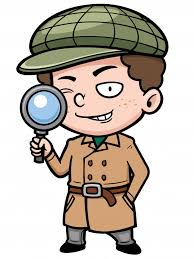